In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling # ydata_profiling instead
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_4148\3064107612.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# Exploratory Data Analysis in just one Line of code
pandas_profiling.ProfileReport(pd.read_csv('churn-dataset.csv'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Import customer Churn Dataset
churn_dataset = pd.read_csv('churn-dataset.csv')

In [5]:
# NUmber of columns and rows in the dataset
churn_dataset.shape

(7043, 21)

In [10]:
churn_dataset['Churn'].head()

# Convert string values ('Yes' and 'No') of churn columns to (1 and 0)
churn_dataset.loc[churn_dataset.Churn == 'Yes', 'Churn'] = 1
churn_dataset.loc[churn_dataset.Churn == 'No', 'Churn'] = 0

In [11]:
# Convert 'No internet service' to 'No'
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in cols:
    churn_dataset[i] = churn_dataset[i].replace({'No internet service' : 'No'})

In [14]:
# Replace all spaces with null values
churn_dataset['TotalCharges'] = churn_dataset['TotalCharges'].replace(" ", np.nan)

# Drop null values of total charges feature
churn_dataset = churn_dataset[churn_dataset['TotalCharges'].notnull()]
churn_dataset = churn_dataset.reset_index()[churn_dataset.columns]

# TotalCharge column values to float
churn_dataset['TotalCharges'] = churn_dataset['TotalCharges'].astype('float')

In [18]:
churn_dataset.Churn.value_counts().values

array([5163, 1869], dtype=int64)

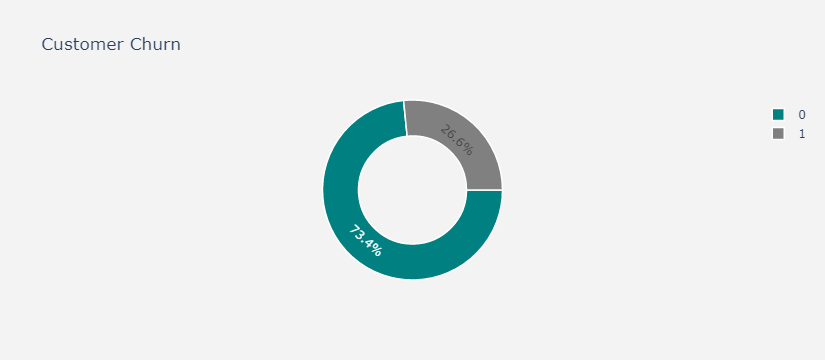

In [23]:
# Visualize Total Customer Churn
plot_by_churn_labels = churn_dataset["Churn"].value_counts().keys().tolist()
plot_by_churn_values = churn_dataset["Churn"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_churn_labels,
           values = plot_by_churn_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Customer Churn",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

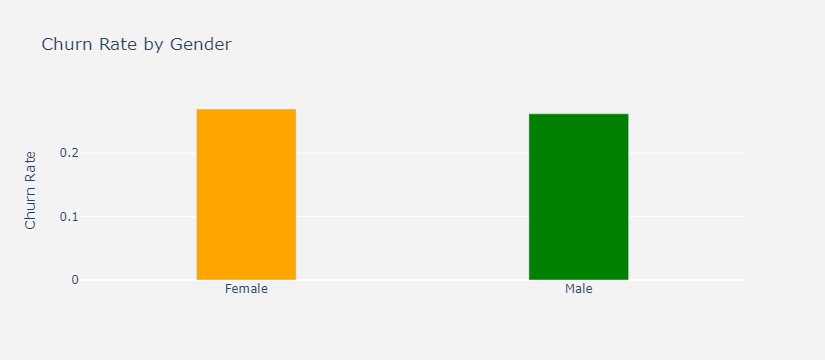

In [24]:
# Visualize Churn rate by Gender
plot_by_gender = churn_dataset.groupby('gender').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_gender['gender'],
        y=plot_by_gender['Churn'],
        width = [0.3, 0.3],
        marker=dict(
        color=['orange', 'green'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

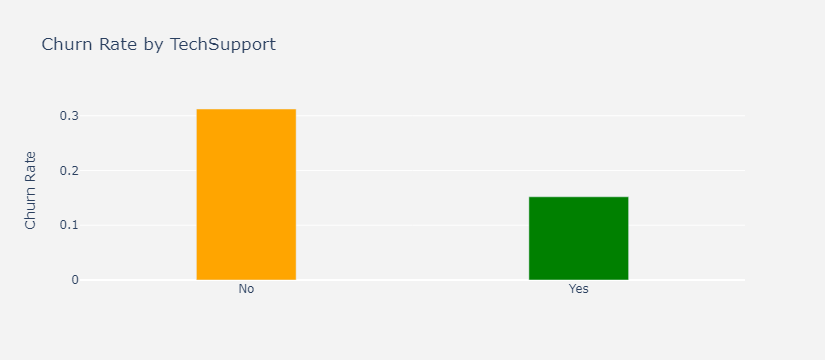

In [26]:
# Visualize Churn by Tech Support
plot_by_techsupport = churn_dataset.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_techsupport['TechSupport'],
        y=plot_by_techsupport['Churn'],
        width = [0.3, 0.3],
        marker=dict(
        color=['orange', 'green'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by TechSupport',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

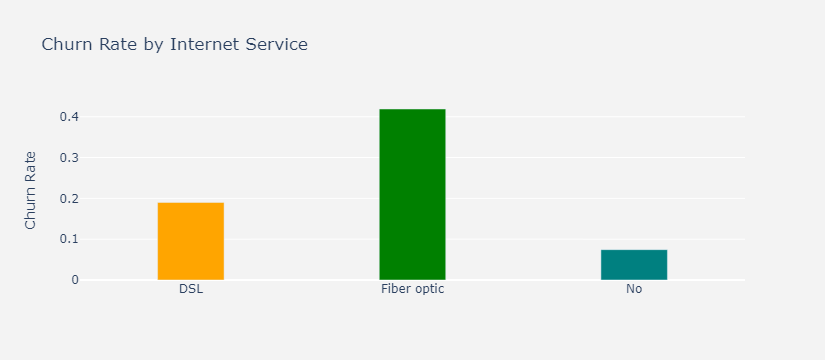

In [30]:
# Visualize Churn by InternetServices
plot_by_internetiervice = churn_dataset.groupby('InternetService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_internetiervice['InternetService'],
        y=plot_by_internetiervice['Churn'],
        width = [0.3, 0.3, 0.3],
        marker=dict(
        color=['orange', 'green', 'teal'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Internet Service',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

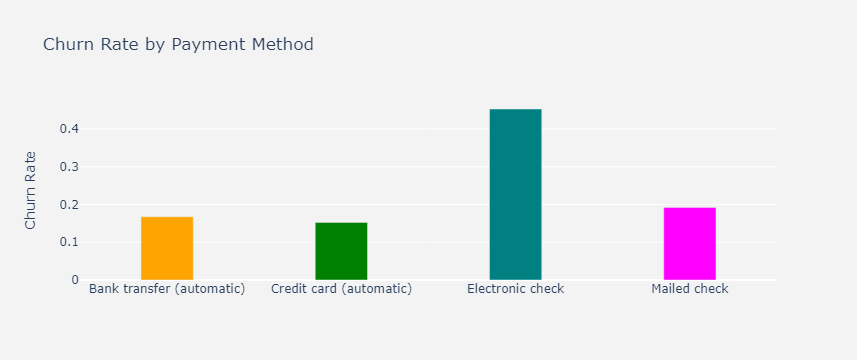

In [32]:
# Visualize Churn by Payment Method
plot_by_payment = churn_dataset.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_payment['PaymentMethod'],
        y=plot_by_payment['Churn'],
        width = [0.3, 0.3, 0.3, 0.3],
        marker=dict(
        color=['orange', 'green', 'teal', 'magenta'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Payment Method',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

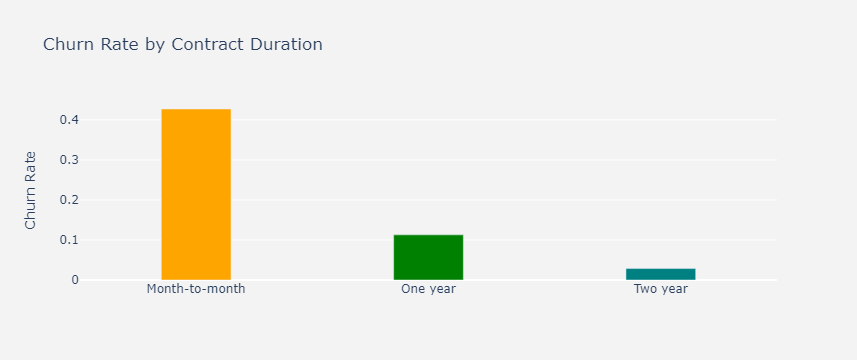

In [33]:
# Visualize Churn by Contract Duration
plot_by_contract = churn_dataset.groupby('Contract').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=plot_by_contract['Contract'],
        y=plot_by_contract['Churn'],
        width = [0.3, 0.3, 0.3, 0.3],
        marker=dict(
        color=['orange', 'green', 'teal', 'magenta'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn Rate by Contract Duration',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

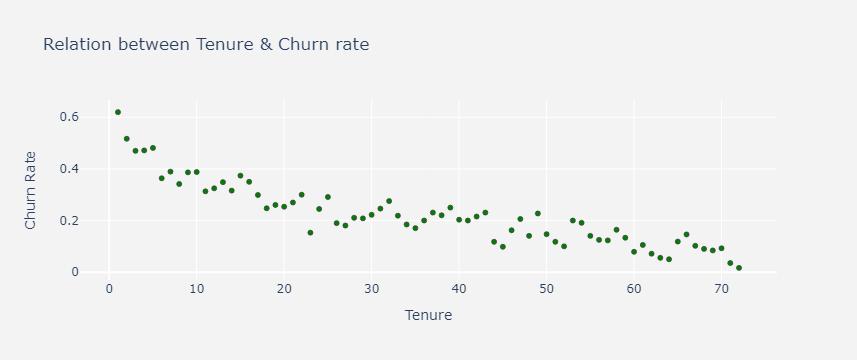

In [34]:
# Visualize Relation between Tenure & Churn rate
plot_by_tenure = churn_dataset.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=plot_by_tenure['tenure'],
        y=plot_by_tenure['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 5,
            line= dict(width=0.8),
            color= 'green'
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Relation between Tenure & Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [35]:
#Perform One Hot Encoding using get_dummies method. pass categories yes no to 1/0
churn_dataset = pd.get_dummies(churn_dataset, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)